In [4]:
import numpy as np
import sympy as sp
from IPython.display import display
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 240
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serrif"
import matplotlib.pyplot as plt
sp.init_printing()
import pandas as pd
import pyPLUTO as pp
from matplotlib import colors, cm
import bachelorproject as bp


units = bp.units(UNIT_LENGTH=1.e8, UNIT_DENSITY=1.e9*bp.CONST_mp, UNIT_VELOCITY=1.e8)
t0 = units.UNIT_TIME

# Hole

## time evolution figure

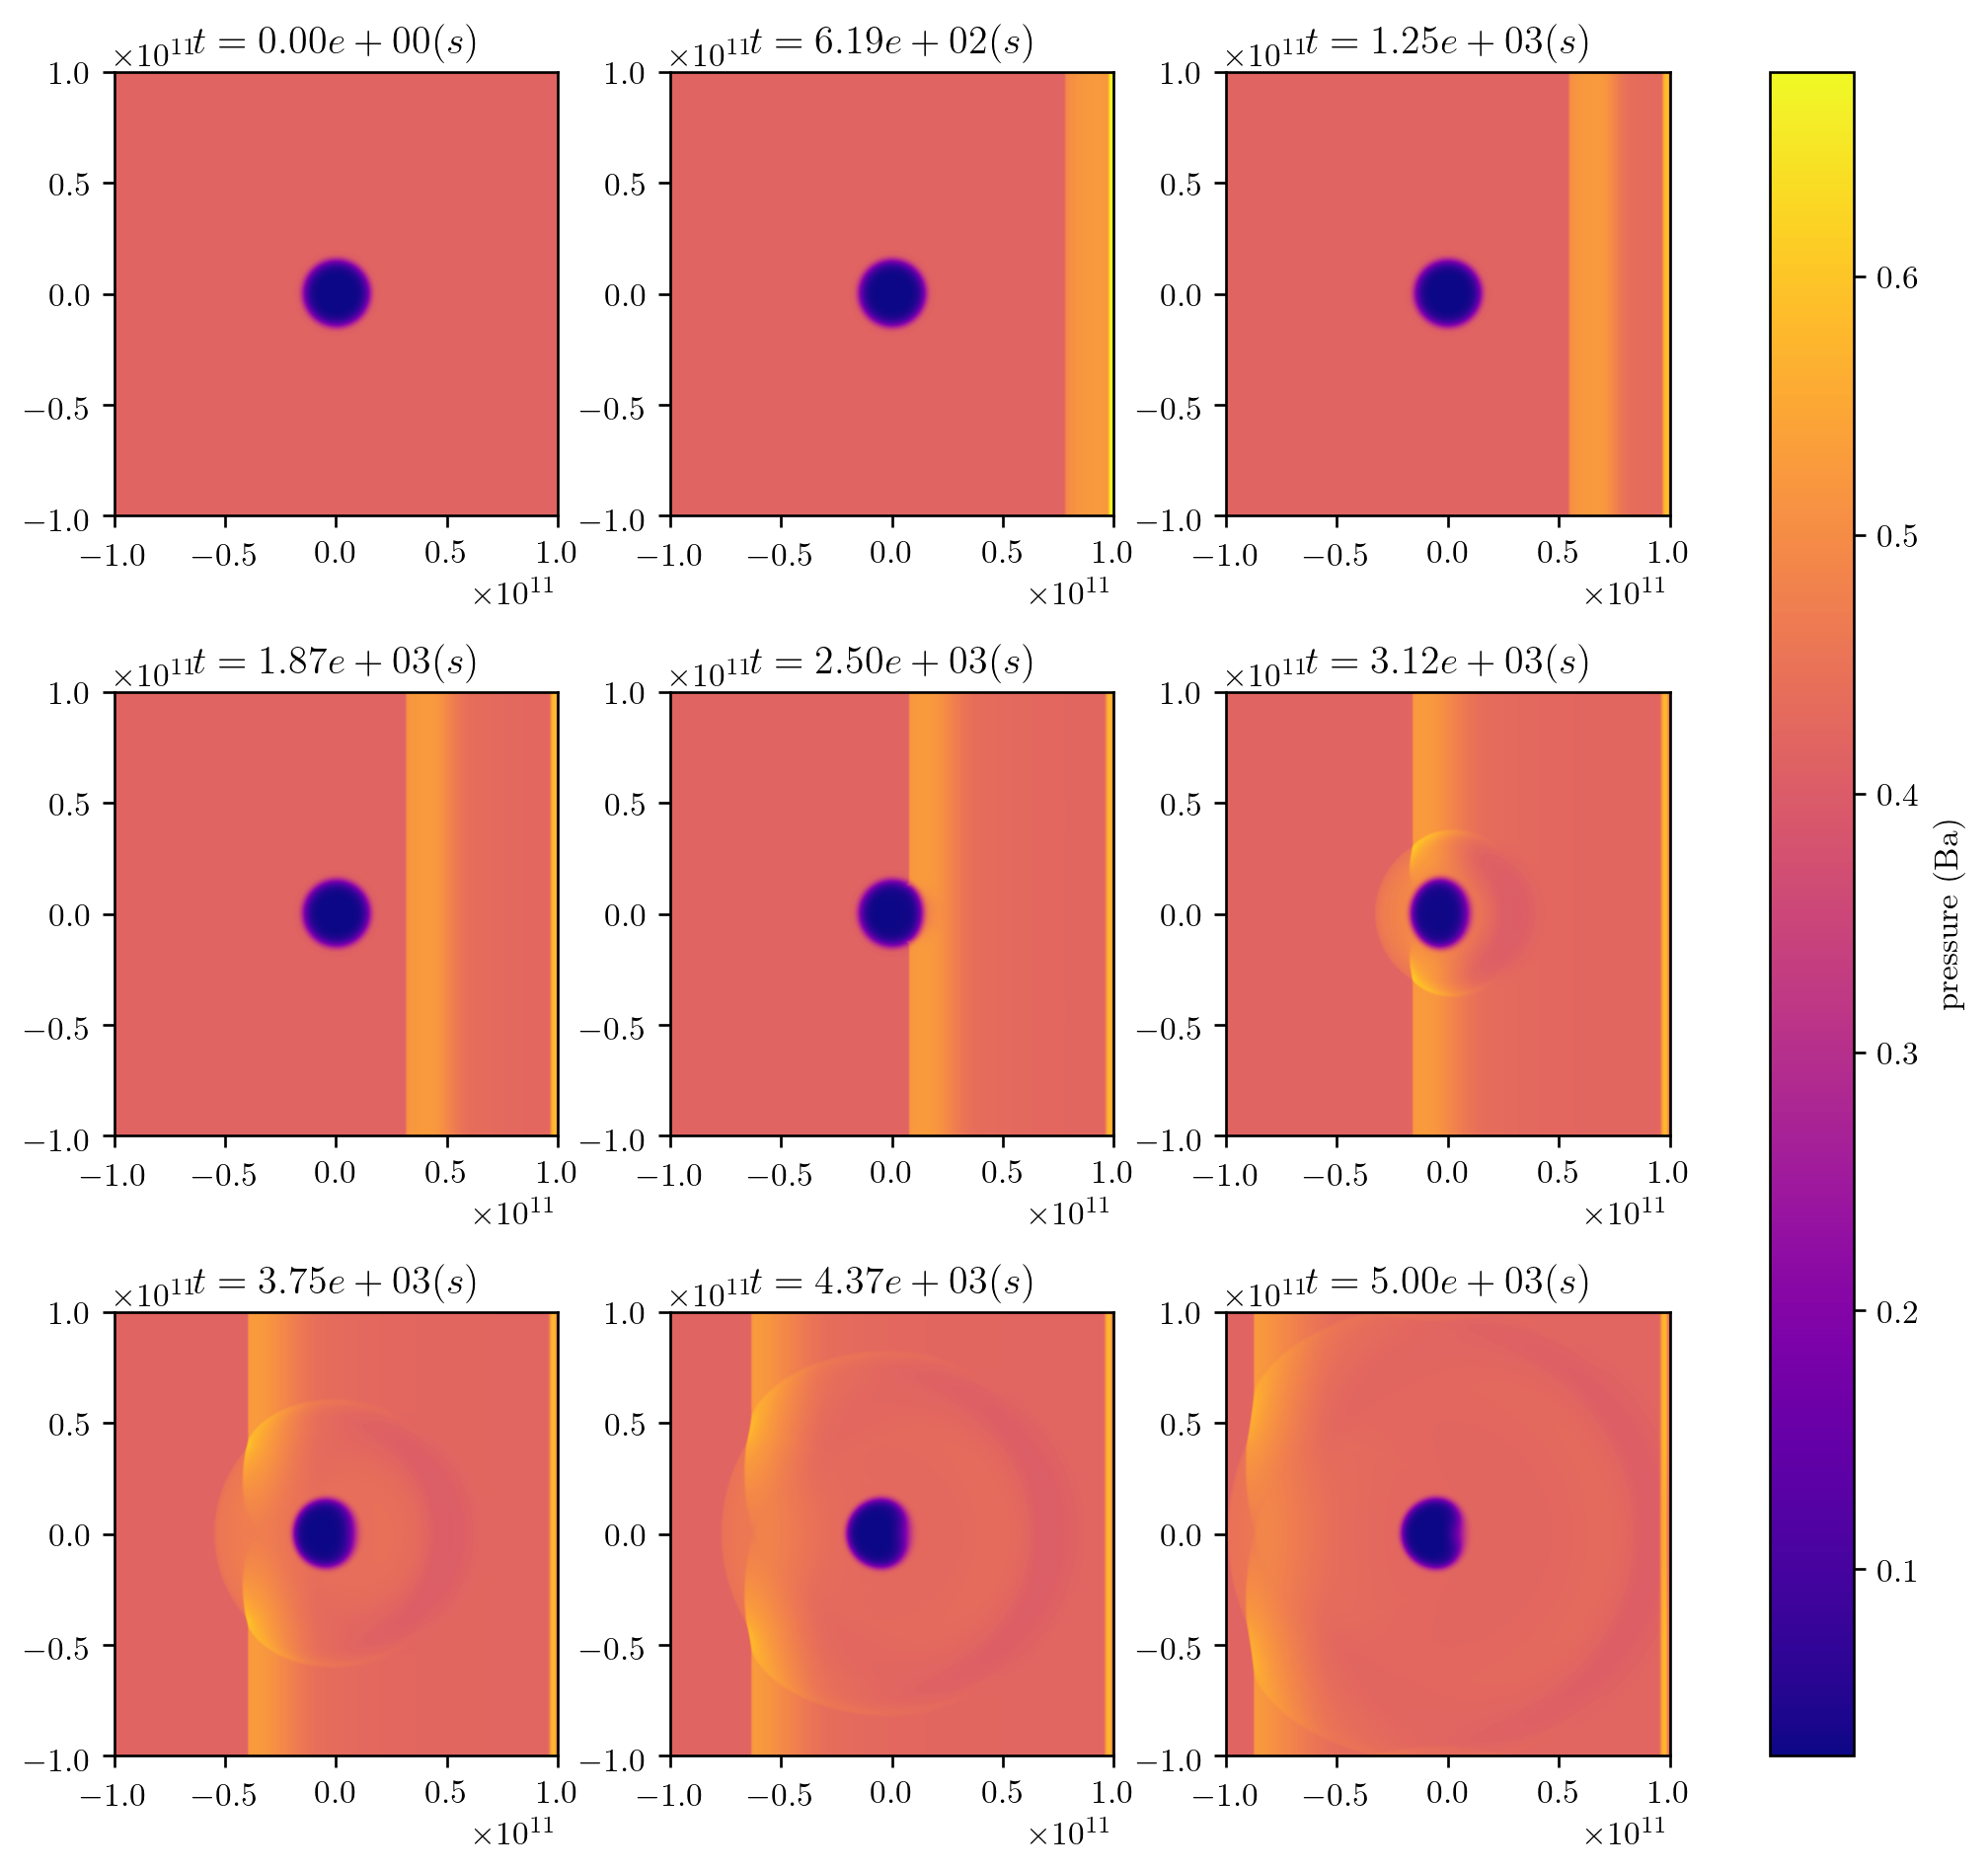

In [6]:
# Time evolution figure

j = 500
T = list(map(lambda t: int(j*t/8), range(9)))
fig, ax, = plt.subplots(3,3, figsize = (9,8))

images = [pp.pload(t, "../pluto-definitions/large_scale_structure/hole/") for t in T]
im = [0]*9

vmin = min(image.prs.min() for image in images)
vmax = max(image.prs.max() for image in images)
# vmax = 11
norm = colors.Normalize(vmin=vmin, vmax=vmax)
norm_true = colors.Normalize(vmin=vmin*units.UNIT_PRESSURE, vmax=vmax*units.UNIT_PRESSURE)

for i in range(9):
    axis = ax[i//3][i%3]
    t = T[i]
    frame = images[i]
    im[i] = bp.plot(axis, frame.prs, frame, norm=norm, L0 = units.UNIT_LENGTH)
    # im[i] = axis.imshow(frame.prs, norm=norm, cmap=cm.plasma)
    axis.set_title("$t = {:.2e} (s)$".format(frame.SimTime*t0))
fig.tight_layout()
fig.colorbar(cm.ScalarMappable(norm=norm_true, cmap=cm.plasma), ax  = ax, label = "pressure (Ba)")
fig.savefig("../report/figures/hole_time.pdf")

# Plume

## Time evolution figure

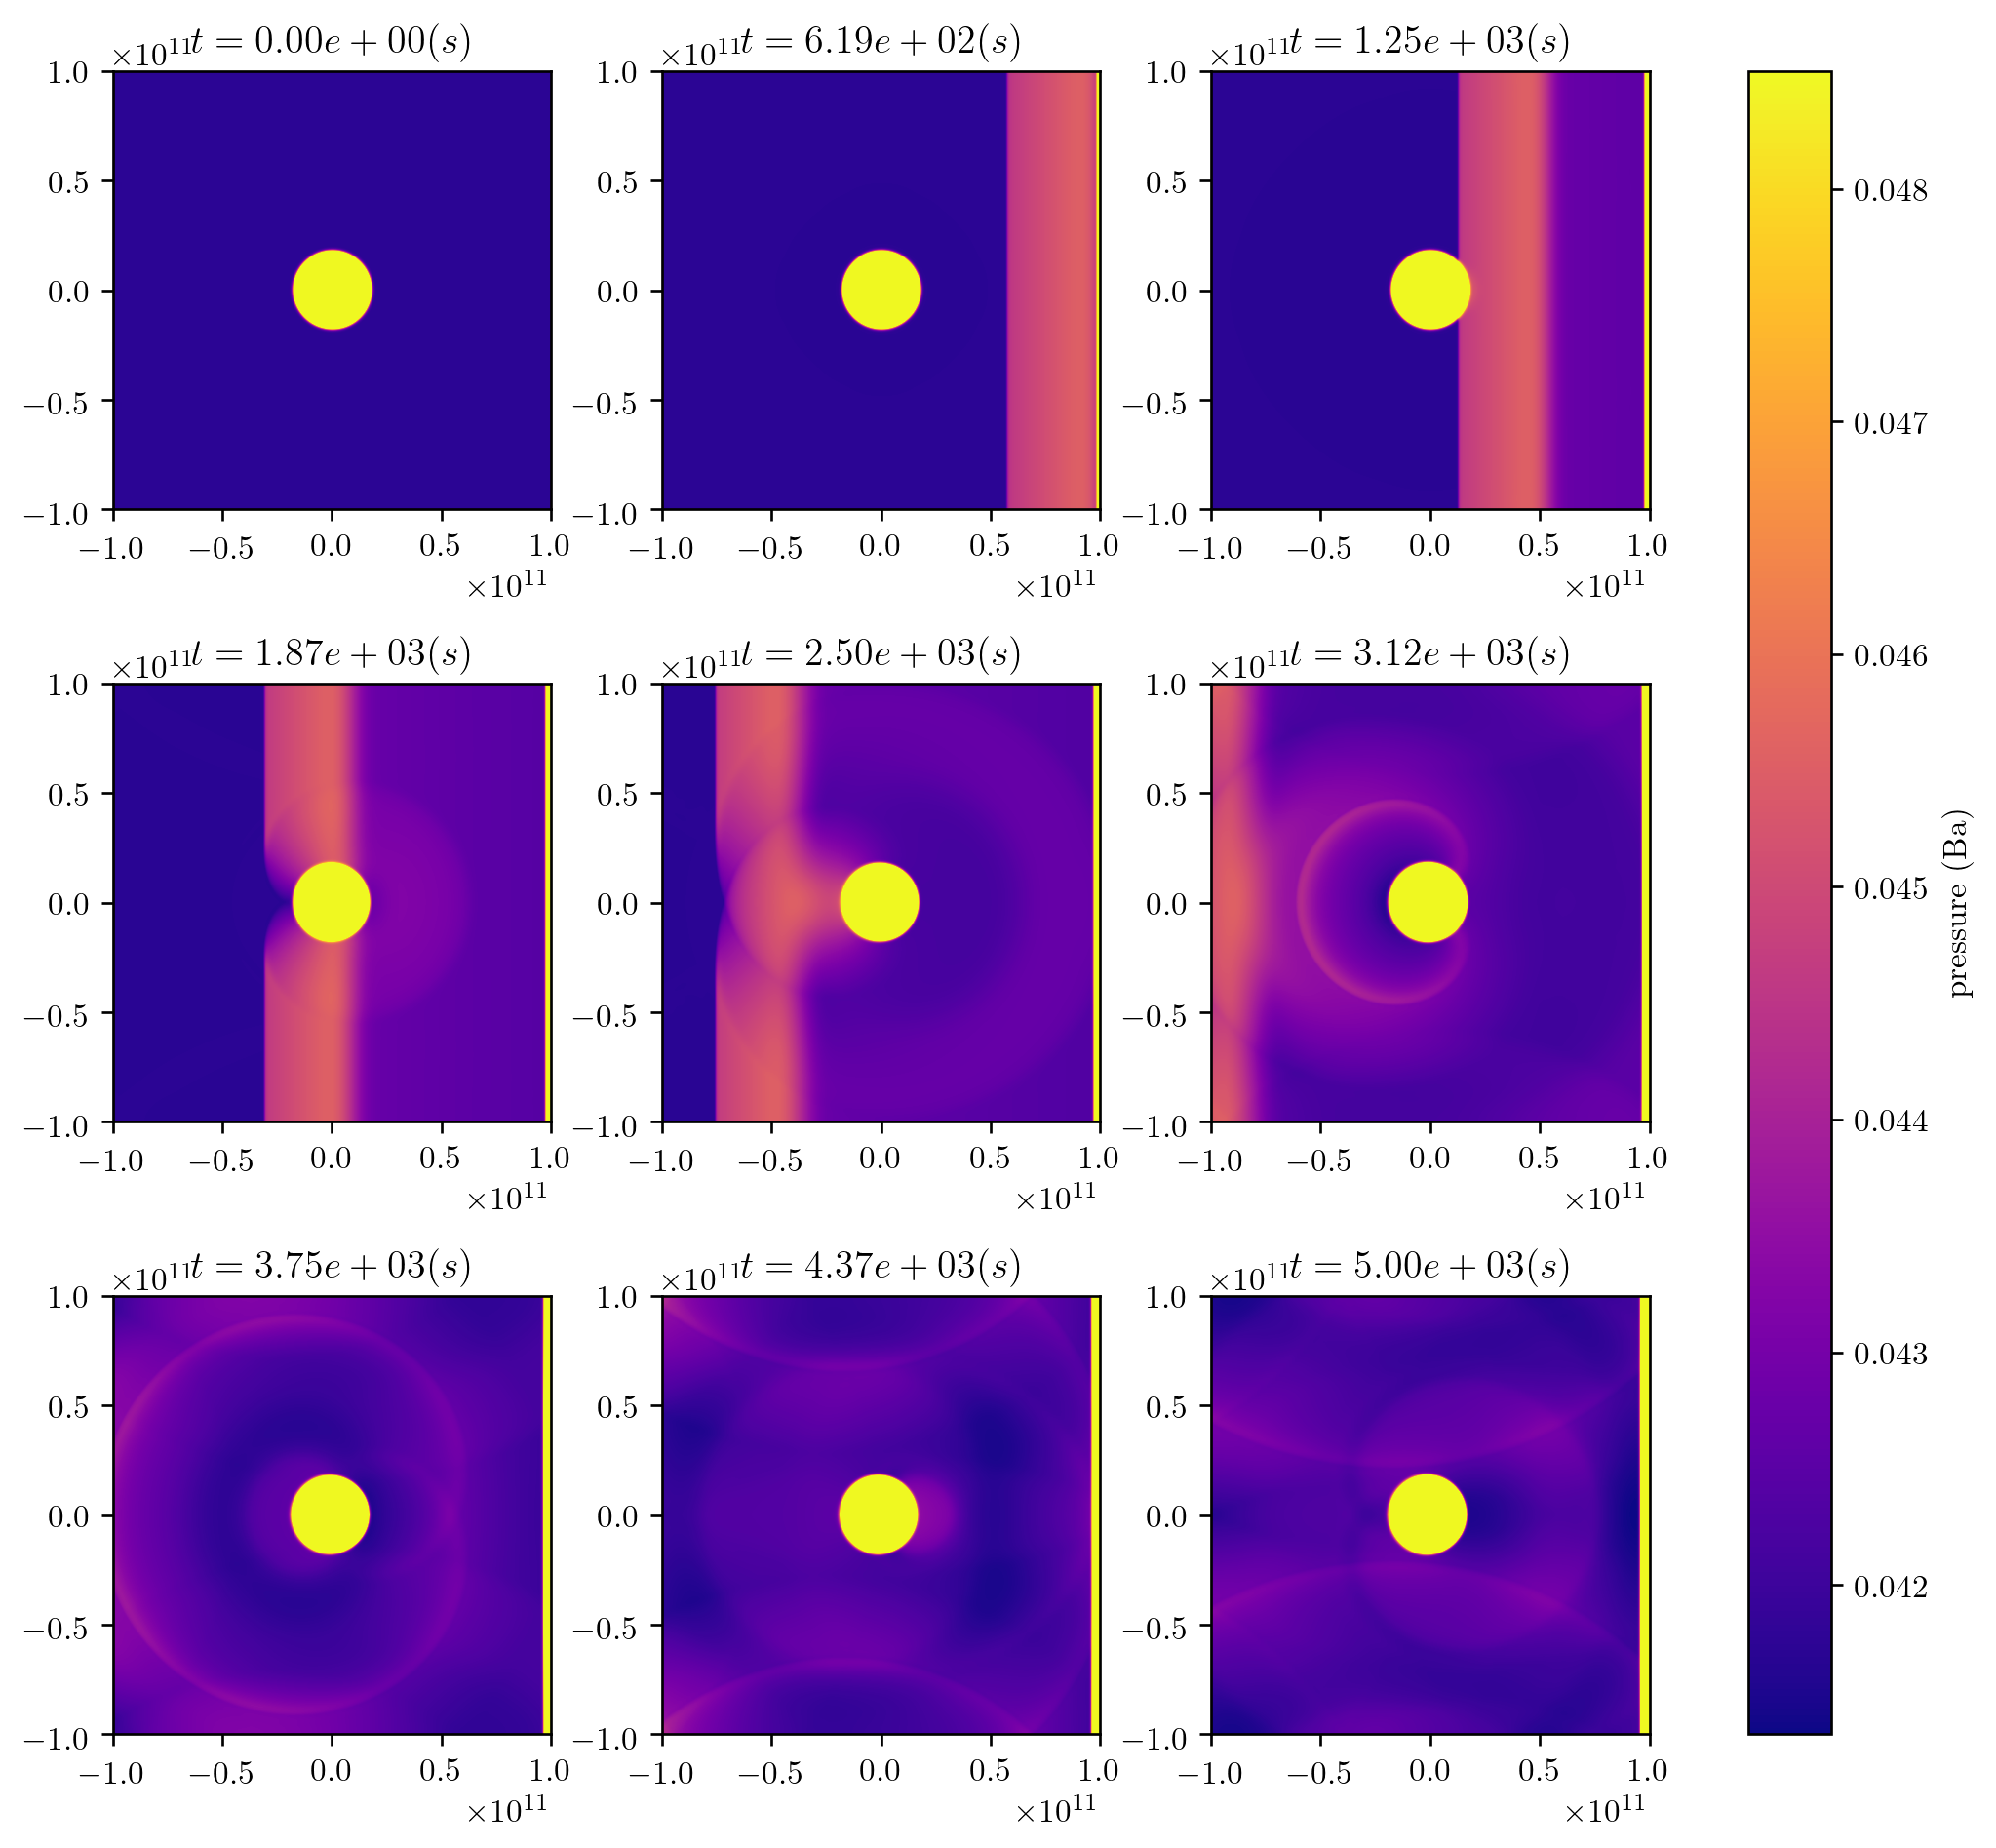

In [7]:
# Time evolution figure

j = 500
T = list(map(lambda t: int(j*t/8), range(9)))
fig, ax, = plt.subplots(3,3, figsize = (9,8))

images = [pp.pload(t, "../pluto-definitions/large_scale_structure/plume/") for t in T]
im = [0]*9

vmin = min(image.prs.min() for image in images)
vmax = max(image.prs.max() for image in images)
vmax = 0.0029
norm = colors.Normalize(vmin=vmin, vmax=vmax)
norm_true = colors.Normalize(vmin=vmin*units.UNIT_PRESSURE, vmax=vmax*units.UNIT_PRESSURE)

for i in range(9):
    axis = ax[i//3][i%3]
    t = T[i]
    frame = images[i]
    im[i] = bp.plot(axis, frame.prs, frame, norm=norm, L0 = units.UNIT_LENGTH)
    # im[i] = axis.imshow(frame.prs, norm=norm, cmap=cm.plasma)
    axis.set_title("$t = {:.2e} (s)$".format(frame.SimTime*t0))
fig.tight_layout()
fig.colorbar(cm.ScalarMappable(norm=norm_true, cmap=cm.plasma), ax  = ax, label = "pressure (Ba)")
fig.savefig("../report/figures/plume_time.pdf")

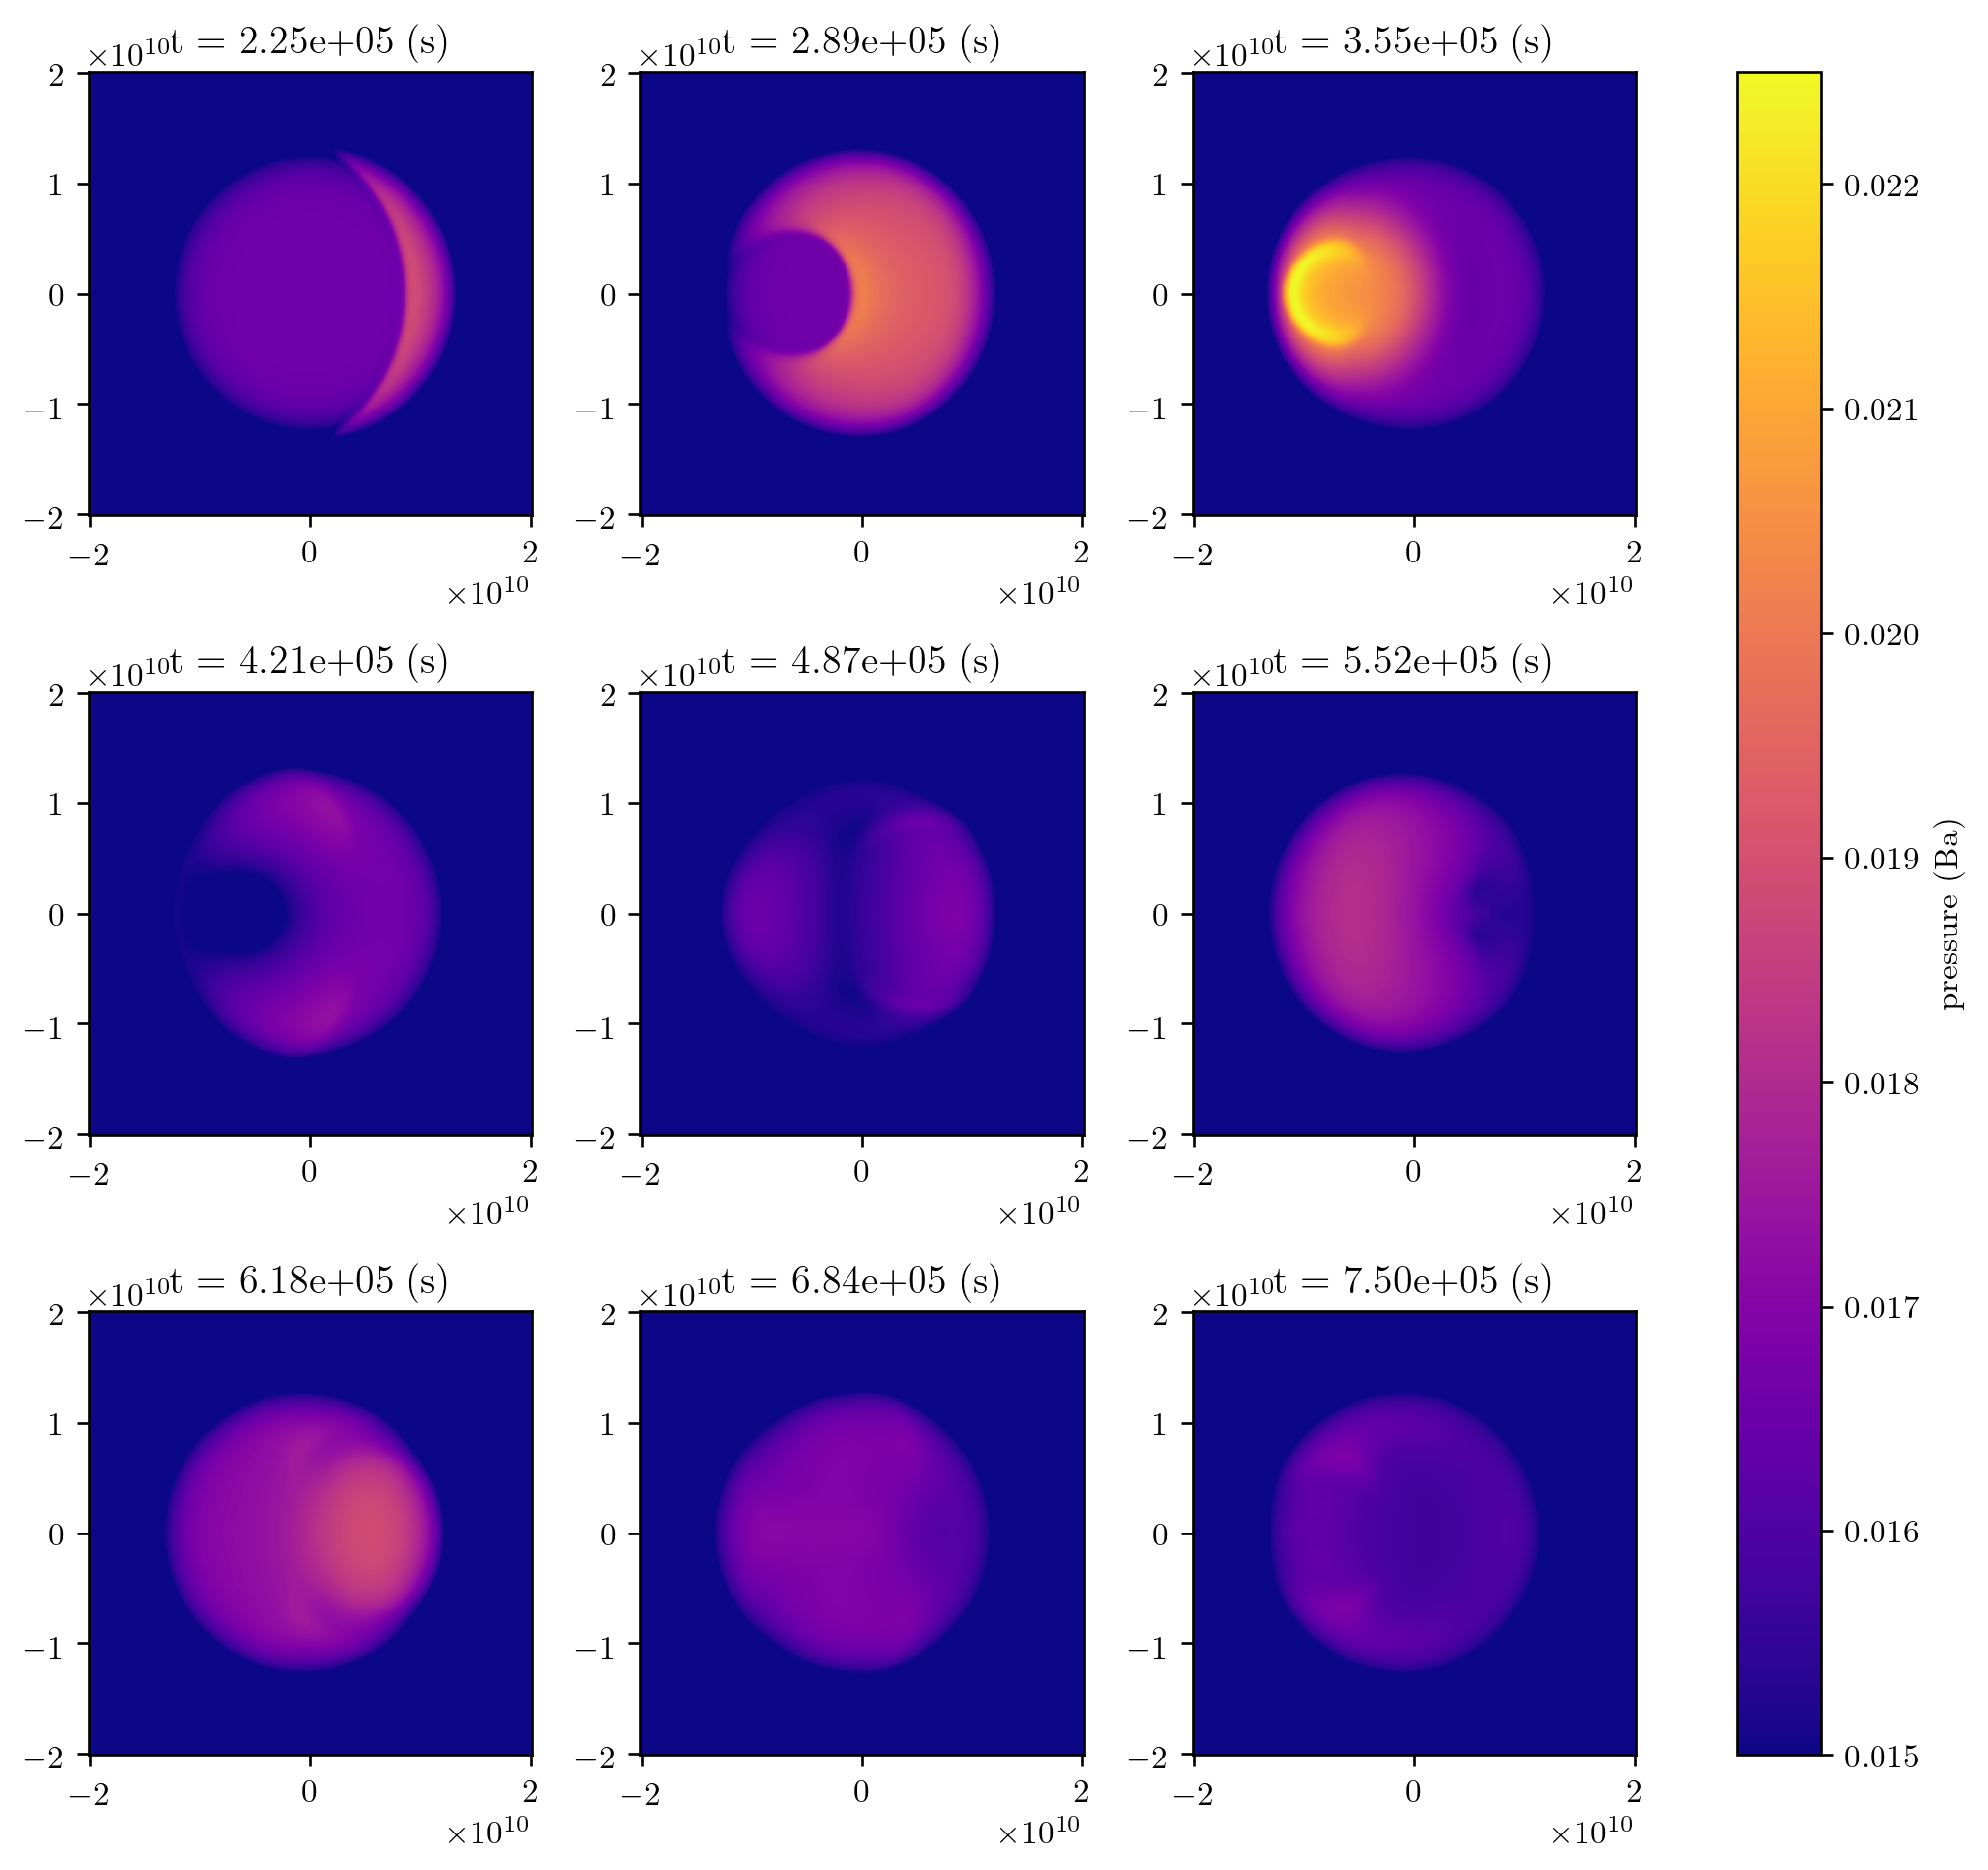

In [8]:
# Time evolution figure
xmin = int(0.4*1024)
xmax = 1024 - xmin
t0 = 150
t1 = 500
T = list(map(lambda t: int((1-t/8)*(t0) + (t/8)*(t1)), range(9)))
fig, ax, = plt.subplots(3,3, figsize = (9,8))

images = [pp.pload(t, "../pluto-definitions/large_scale_structure/plume/") for t in T]
im = [0]*9

vmin = min(image.prs.min() for image in images)
vmax = max(image.prs.max() for image in images)
vmin = 0.015
# # vmax = 0.0029
norm = colors.Normalize(vmin=vmin, vmax=vmax)
norm_true = colors.Normalize(vmin=vmin*units.UNIT_PRESSURE, vmax=vmax*units.UNIT_PRESSURE)

for i in range(9):
    axis = ax[i//3][i%3]
    t = T[i]
    frame = images[i]
    im[i] = bp.plot(axis, frame.prs, frame, norm=norm, L0 = units.UNIT_LENGTH, x_min = xmin, x_max = xmax, y_min = xmin, y_max = xmax )  # im[i] = axis.imshow(frame.prs, norm=norm, cmap=cm.plasma)
    axis.set_title("t = {:.2e} (s)".format(frame.SimTime*t0))

fig.tight_layout()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.plasma), ax  = ax, label = "pressure (Ba)")
fig.savefig("../report/figures/plume_reflection.pdf")

In [8]:
A = [1,2,3,4,5]
A[0:5]